In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## Import the csv

In [4]:
df = pd.read_csv(r"C:\Users\91700\Desktop\ML-Projects\notebook\data\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y variables

In [6]:
x=df.drop(columns=['math score'],axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
y=df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [8]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScalar",numeric_transformer,num_features)
    ]
)


In [9]:
X=preprocessor.fit_transform(x)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [10]:
X.shape

(1000, 19)

In [11]:
# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

## Create a evaluation function to give all metrics after model training

In [12]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

    

In [13]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    # Make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Evaluate Train Test dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- RMSE: {:f}".format(model_train_rmse))
    print("- MAE : {:f}".format(model_train_mae))
    print("- R2 Score : {:f}".format(model_train_r2))

    print('---------------------------------')


    print('Model performance for Test set')
    print("- RMSE: {:f}".format(model_test_rmse))
    print("- MAE : {:f}".format(model_test_mae))
    print("- R2 Score : {:f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")



Linear Regression
Model performance for Training set
- RMSE: 5.323051
- MAE : 4.266712
- R2 Score : 0.874317
---------------------------------
Model performance for Test set
- RMSE: 5.393994
- MAE : 4.214763
- R2 Score : 0.880433


Lasso
Model performance for Training set
- RMSE: 6.593816
- MAE : 5.206303
- R2 Score : 0.807146
---------------------------------
Model performance for Test set
- RMSE: 6.519695
- MAE : 5.157882
- R2 Score : 0.825320


Ridge
Model performance for Training set
- RMSE: 5.323325
- MAE : 4.264988
- R2 Score : 0.874304
---------------------------------
Model performance for Test set
- RMSE: 5.390387
- MAE : 4.211101
- R2 Score : 0.880593


K-Neighbors Regressor
Model performance for Training set
- RMSE: 5.707683
- MAE : 4.516750
- R2 Score : 0.855498
---------------------------------
Model performance for Test set
- RMSE: 7.253041
- MAE : 5.621000
- R2 Score : 0.783813


Decision Tree
Model performance for Training set
- RMSE: 0.279508
- MAE : 0.018750
- R2 Scor

## Results

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2 Score"]).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851360
8,AdaBoost Regressor,0.849565
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.733889


## Linear Regression

In [15]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

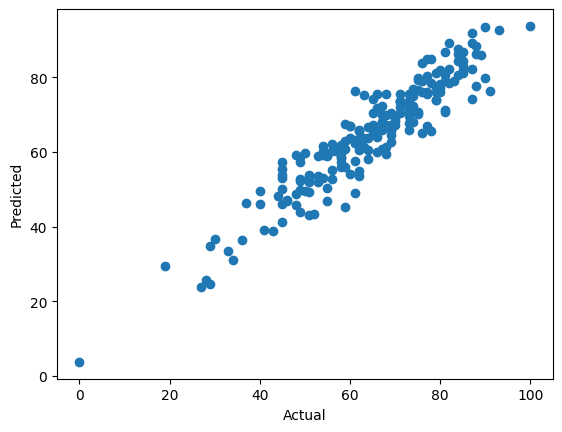

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

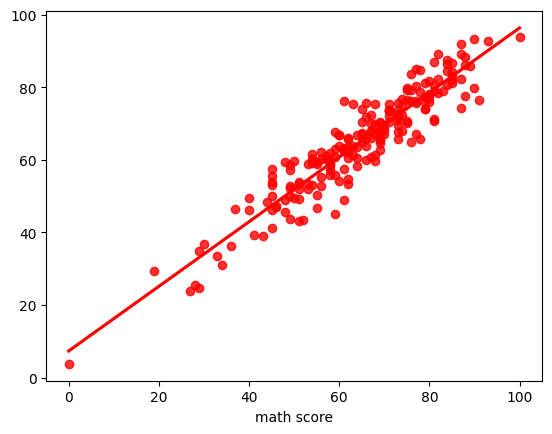

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")